In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Part 1: Read in data
'''
    glob
        - The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix
    glob.glob(pathname, *, root_dir=None, dir_fd=None, recursive=False, include_hidden=False)
        - Return a possibly empty list of path names that match pathname, which must be a string containing a path specification. pathname can be either absolute (like /usr/src/Python-1.5/Makefile) or relative (like ../../Tools/*/*.gif), 
'''
path = r'D:\Program Files\data_analysis_with_python\Project 4 - data\\'
all_files = glob.glob(path + 'monthly data\*.csv')
#all_files = glob.glob(r"C:\Users\aleci\Documents\fannie mae\data\monthly data\*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
print(df)

<ipython-input-3-fb0a1de56e5d>:5: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files))
<ipython-input-3-fb0a1de56e5d>:5: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files))
<ipython-input-3-fb0a1de56e5d>:5: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files))


       Unnamed: 0  POOL_ID       LOAN_ID  ACT_PERIOD CHANNEL  ORIG_RATE  \
0             0.0      NaN  100043130733       12018       C      4.625   
1             1.0      NaN  102010037115       12018       R      4.125   
2             2.0      NaN  102511997214       12018       C      4.250   
3             3.0      NaN  102663545967       12018       B      4.375   
4             4.0      NaN  105586176439       12018       B      4.250   
...           ...      ...           ...         ...     ...        ...   
53214     53214.0      NaN     132265499       32022       R      3.875   
53215     53215.0      NaN     132274061       32022       R      3.500   
53216     53216.0      NaN     132274937       32022       B      4.250   
53217     53217.0      NaN     132276011       32022       B      4.250   
53218     53218.0      NaN     132278110       32022       R      3.250   

       CURR_RATE  ORIG_UPB  ISSUANCE_UPB  CURRENT_UPB  ...  state  \
0          4.625  405000.0    

In [4]:
df.head()

,Unnamed: 0,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,CURRENT_UPB,...,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population,ACT_PERIOD.1
0,0.0,NaN,100043130733,12018,C,4.625,4.625,405000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
1,1.0,NaN,102010037115,12018,R,4.125,4.125,431000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
2,2.0,NaN,102511997214,12018,C,4.250,4.250,636000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
3,3.0,NaN,102663545967,12018,B,4.375,4.375,650000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
4,4.0,NaN,105586176439,12018,B,4.250,4.250,453000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242072 entries, 0 to 53218
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                float64
 1   POOL_ID                   float64
 2   LOAN_ID                   int64  
 3   ACT_PERIOD                int64  
 4   CHANNEL                   object 
 5   ORIG_RATE                 float64
 6   CURR_RATE                 float64
 7   ORIG_UPB                  float64
 8   ISSUANCE_UPB              float64
 9   CURRENT_UPB               float64
 10  ORIG_TERM                 int64  
 11  ORIG_DATE                 int64  
 12  OLTV                      int64  
 13  OCLTV                     float64
 14  DTI                       float64
 15  CSCORE_B                  float64
 16  CSCORE_C                  float64
 17  PURPOSE                   object 
 18  PROP                      object 
 19  NO_UNITS                  int64  
 20  STATE                     

In [6]:
df[['LOAN_ID', 'ORIG_TERM', 'ORIG_DATE']].head()

,LOAN_ID,ORIG_TERM,ORIG_DATE
0,100043130733,360,122017
1,102010037115,240,12018
2,102511997214,360,112017
3,102663545967,360,122017
4,105586176439,360,122017


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242072 entries, 0 to 53218
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                float64
 1   POOL_ID                   float64
 2   LOAN_ID                   int64  
 3   ACT_PERIOD                int64  
 4   CHANNEL                   object 
 5   ORIG_RATE                 float64
 6   CURR_RATE                 float64
 7   ORIG_UPB                  float64
 8   ISSUANCE_UPB              float64
 9   CURRENT_UPB               float64
 10  ORIG_TERM                 int64  
 11  ORIG_DATE                 int64  
 12  OLTV                      int64  
 13  OCLTV                     float64
 14  DTI                       float64
 15  CSCORE_B                  float64
 16  CSCORE_C                  float64
 17  PURPOSE                   object 
 18  PROP                      object 
 19  NO_UNITS                  int64  
 20  STATE                     

In [8]:
df[['POOL_ID', 'LOAN_ID']].nunique()

POOL_ID          0
LOAN_ID    1117951
dtype: int64

In [9]:
df.sort_values(by = 'LOAN_ID', inplace = True)
df[['LOAN_ID', 'ORIG_RATE', 'ORIG_UPB', 'ORIG_DATE']].head(30)

,LOAN_ID,ORIG_RATE,ORIG_UPB,ORIG_DATE
0,97473078,4.250,674000.0,72019
0,97473078,4.250,674000.0,72019
0,97473078,4.250,674000.0,72019
96,97473081,5.375,223000.0,62019
202,97473081,5.375,223000.0,62019
328,97473081,5.375,223000.0,62019
916,97473083,4.875,451000.0,62019
1406,97473083,4.875,451000.0,62019
446,97473083,4.875,451000.0,62019
879,97473089,4.250,534000.0,62019


In [10]:
# delete duplicated loans
df_nodup = df.drop_duplicates(subset = 'LOAN_ID', keep = 'first')
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117951 entries, 0 to 17336
Data columns (total 43 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1111879 non-null  float64
 1   POOL_ID                   0 non-null        float64
 2   LOAN_ID                   1117951 non-null  int64  
 3   ACT_PERIOD                1117951 non-null  int64  
 4   CHANNEL                   1117951 non-null  object 
 5   ORIG_RATE                 1117951 non-null  float64
 6   CURR_RATE                 1116774 non-null  float64
 7   ORIG_UPB                  1117951 non-null  float64
 8   ISSUANCE_UPB              0 non-null        float64
 9   CURRENT_UPB               1117951 non-null  float64
 10  ORIG_TERM                 1117951 non-null  int64  
 11  ORIG_DATE                 1117951 non-null  int64  
 12  OLTV                      1117951 non-null  int64  
 13  OCLTV                     111

In [11]:
df['OLTV'].describe()

count    2.242072e+06
mean     6.204318e+01
std      1.910558e+01
min      2.000000e+00
25%      4.900000e+01
50%      6.300000e+01
75%      7.500000e+01
max      9.700000e+01
Name: OLTV, dtype: float64

In [12]:
## Part 2: Interest Rate and Mortgage Origination
# How does interest rate impact mortgage originations?

# combine origination data with interest rate?
df_nodup['orig_month'] = (df_nodup['ORIG_DATE'] / 10000).apply(np.floor)
df_nodup['orig_year'] = df_nodup['ORIG_DATE'] - df_nodup['orig_month'] * 10000
df_nodup['orig_year_month'] = (df_nodup['orig_year'] * 100 + df_nodup['orig_month']).astype(int)

df_nodup[['LOAN_ID', 'ORIG_DATE', 'orig_year_month']]

<ipython-input-12-b31d4f3c6173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['orig_month'] = (df_nodup['ORIG_DATE'] / 10000).apply(np.floor)
<ipython-input-12-b31d4f3c6173>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['orig_year'] = df_nodup['ORIG_DATE'] - df_nodup['orig_month'] * 10000
<ipython-input-12-b31d4f3c6173>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,LOAN_ID,ORIG_DATE,orig_year_month
0,97473078,72019,201907
96,97473081,62019,201906
916,97473083,62019,201906
879,97473089,62019,201906
1311,97473091,62019,201906
...,...,...,...
5855,999984487607,62018,201806
15391,999986905499,52018,201805
6623,999988608316,82018,201808
9090,999996626839,92018,201809


In [13]:
# Aggregate loans by purpose and by month
df_sum = df_nodup.groupby(['PURPOSE', 'orig_year_month'])['LOAN_ID'].count().reset_index()

In [14]:
df_sum

,PURPOSE,orig_year_month,LOAN_ID
0,C,201612,3
1,C,201701,17
2,C,201702,21
3,C,201703,12
4,C,201704,15
...,...,...,...
188,R,202111,7698
189,R,202112,6347
190,R,202201,4614
191,R,202202,2764


In [15]:
# Get separate loans
loan_purchase = df_sum[df_sum['PURPOSE'] == 'P'].rename(columns = {'LOAN_ID': 'purchase_cnt'})
loan_refinance = df_sum[df_sum['PURPOSE'] == 'R'].rename(columns = {'LOAN_ID': 'refinance_cnt'})
loan_cashout = df_sum[df_sum['PURPOSE'] == 'C'].rename(columns = {'LOAN_ID': 'cashout_cnt'})

In [16]:
rate_file = pd.read_excel(path + 'historical 30-year mortgage rates.xls')
rate_file.head()

,year_month,Rate
0,201801,4.03
1,201802,4.33
2,201803,4.44
3,201804,4.47
4,201805,4.59


In [17]:
loan_refinance.head()

,PURPOSE,orig_year_month,refinance_cnt
128,R,201610,1
129,R,201612,3
130,R,201701,11
131,R,201702,10
132,R,201703,4


In [18]:
from functools import reduce

'''
    reduce
        - Applies function of two arguments cumulatively to the items of iterable, from left to right, so as to reduce the iterable to a single value.
        
        >>> reduce(lambda x, y: x+y, [1, 2, 3, 4]) # the left argument, x, is the accumulated value and the right argument, y, is the update value from the iterable.
        10 # ((1+2)+3)+4)
        >>> reduce(lambda x, y: x-y, [125, 25, 5, 1])
        94 # ((125-25)-5)-1)
        >>> reduce(lambda x, y: x*y, [2, 2, 2, 2])
        16 # ((2*2)*2)*2)
        >>> reduce(lambda x, y: x/y, [125, 25, 5, 1])
        1 # ((125/25)/5)/1)
        >>> reduce(lambda x, y: x*y, [1])
        1
'''

rate_file = rate_file.rename(columns = {'year_month': 'orig_year_month'})
allfiles = [loan_purchase, loan_refinance, loan_cashout, rate_file]
allcombined = reduce(lambda left, right: pd.merge(left, right, on = 'orig_year_month', how = 'outer'), allfiles)

In [19]:
allcombined = allcombined[(allcombined['orig_year_month'] >= 201801) & (allcombined['orig_year_month'] <= 202112)]
allcombined.head()

,PURPOSE_x,orig_year_month,purchase_cnt,PURPOSE_y,refinance_cnt,PURPOSE,cashout_cnt,Rate
13,P,201801,3421.0,R,2571,C,4318.0,4.03
14,P,201802,3203.0,R,1936,C,3717.0,4.33
15,P,201803,4234.0,R,1715,C,3943.0,4.44
16,P,201804,4323.0,R,1465,C,3677.0,4.47
17,P,201805,4755.0,R,1351,C,3506.0,4.59


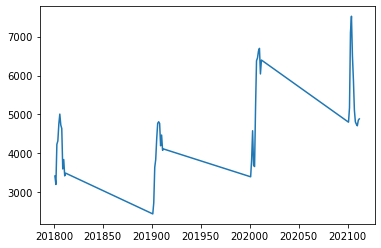

In [23]:
# Analysis 1: Interest Movement and Mortgage Origination by month
fig = plt.figure()
plt.plot(allcombined['orig_year_month'], allcombined['purchase_cnt'])

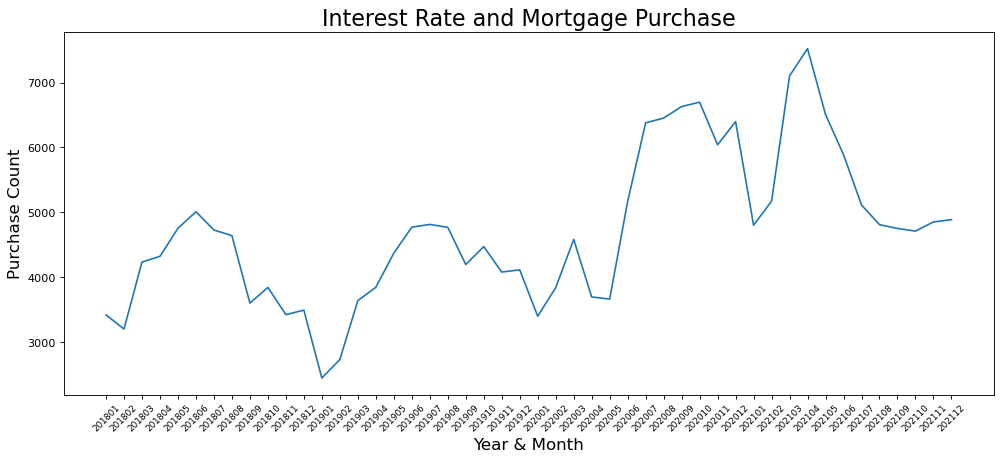

In [25]:
# The above graph does not look correct because orig_year_month is expressed in numeric
allcombined['year_month'] = allcombined['orig_year_month'].astype(str)

from matplotlib.pyplot import figure
figure(figsize = (15, 6), dpi = 80)

plt.plot(allcombined['year_month'], allcombined['purchase_cnt'])
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel('Year & Month', fontsize = 15)
plt.ylabel('Purchase Count', fontsize = 15)
plt.title("Interest Rate and Mortgage Purchase", fontsize = 20)
plt.show()

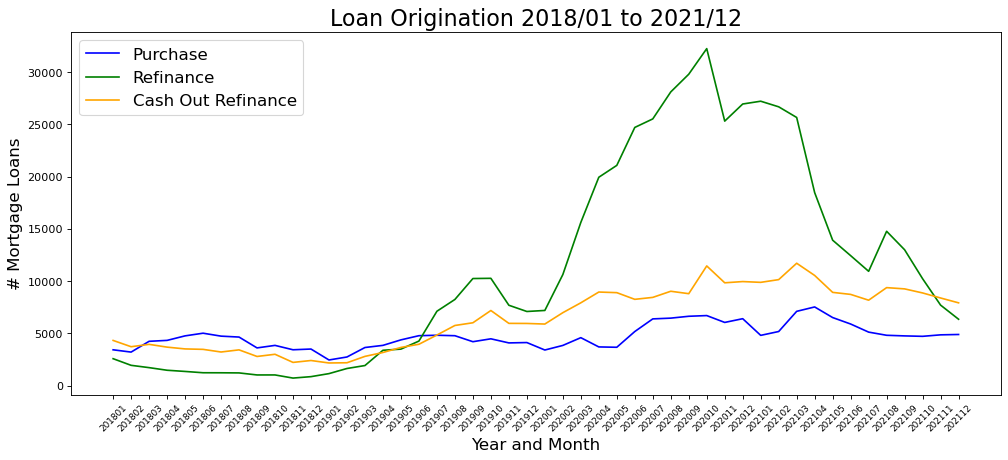

In [28]:
# draw 3 lines in 1 graph
figure(figsize = (15, 6), dpi = 80)

plt.plot(allcombined['year_month'], allcombined['purchase_cnt'], color = 'b', label = 'Purchase')
plt.plot(allcombined['year_month'], allcombined['refinance_cnt'], color = 'g', label = 'Refinance')
plt.plot(allcombined['year_month'], allcombined['cashout_cnt'], color = 'orange', label = 'Cash Out Refinance')
plt.title('Loan Origination 2018/01 to 2021/12', fontsize = 20)
plt.xlabel('Year and Month', fontsize = 15)
plt.ylabel('# Mortgage Loans', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 8)
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()

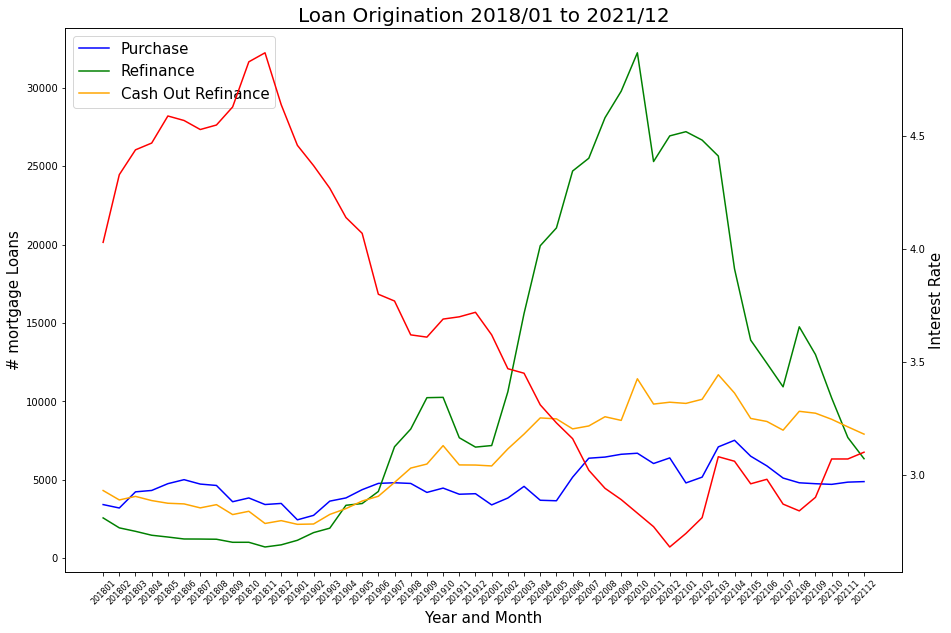

In [29]:
# add interest rate in the 2nd y axis

fig, ax1=plt.subplots(figsize=(15, 10))

ax2=ax1.twinx()
ax1.plot(allcombined['year_month'], allcombined['purchase_cnt'], color='b', label='Purchase')
ax1.plot(allcombined['year_month'], allcombined['refinance_cnt'], color='g', label='Refinance')
ax1.plot(allcombined['year_month'], allcombined['cashout_cnt'], color='orange', label='Cash Out Refinance')
ax2.plot(allcombined['year_month'], allcombined['Rate'], color='r', label='30-year Fixed Rate')

ax1.set_title('Loan Origination 2018/01 to 2021/12', fontsize=20)
ax1.set_xlabel('Year and Month', fontsize=15)
ax1.set_ylabel('# mortgage Loans', fontsize=15)
ax1.set_xticks(allcombined['year_month'])
ax1.set_xticklabels(allcombined['year_month'], rotation=45, fontsize=8)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylabel('Interest Rate', fontsize=15)

plt.show()

In [ ]:
# We can roughly tell that when interest rate goes up, mortgage origination will go down
# We can do further analysis to testify our hypothesis

In [30]:
# Analysis 2: Correlation Analysis
from numpy import *
variable_list = [allcombined['Rate'], allcombined['purchase_cnt'], allcombined['refinance_cnt'], allcombined['cashout_cnt']]
corrcoef(variable_list)

array([[ 1.        , -0.66027677, -0.84592067, -0.9474206 ],
       [-0.66027677,  1.        ,  0.70272687,  0.72666304],
       [-0.84592067,  0.70272687,  1.        ,  0.88547585],
       [-0.9474206 ,  0.72666304,  0.88547585,  1.        ]])

<AxesSubplot:>

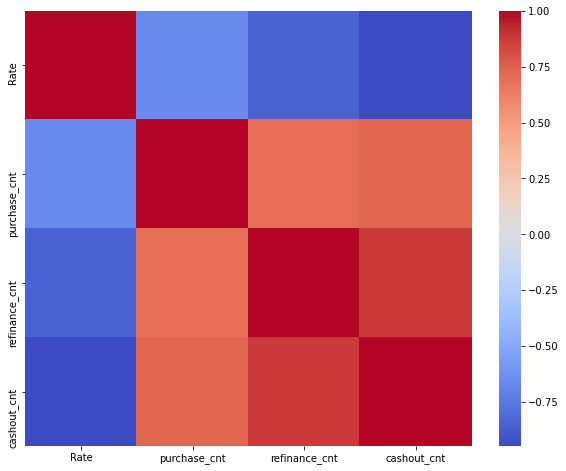

In [31]:
fig = plt.figure(figsize = (10, 8))
column_list = ['Rate', 'purchase_cnt', 'refinance_cnt', 'cashout_cnt']
sns.heatmap(allcombined[column_list].corr(), cmap = 'coolwarm')

<AxesSubplot:>

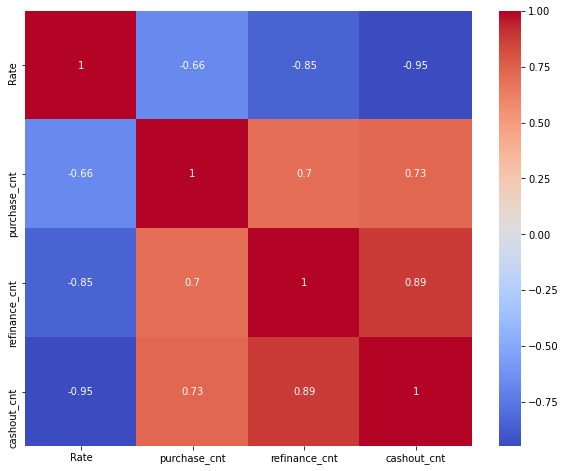

In [32]:
fig=plt.figure(figsize=(10, 8))

column_list=['Rate', 'purchase_cnt', 'refinance_cnt', 'cashout_cnt']
sns.heatmap(allcombined[column_list].corr(), cmap="coolwarm", annot=True)

<AxesSubplot:title={'center':'Correlation with Interest Rate'}>

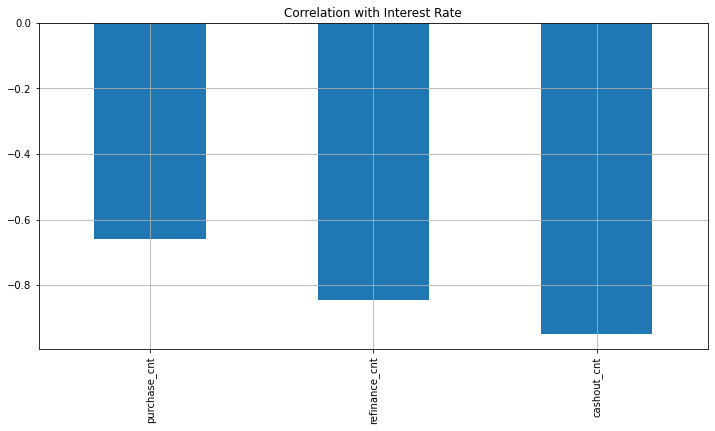

In [33]:
allcombined[['purchase_cnt', 'refinance_cnt', 'cashout_cnt']].corrwith(allcombined['Rate']).plot.bar(
    figsize = (12, 6), title = 'Correlation with Interest Rate', grid = True
)

In [34]:
'''
    Rule of Thumb
        0-0.2: no correlation
        0.2-0.4: weak correlation
        0.4-0.6: moderate correlation
        0.6-0.8: strong correlation
        0.8 and above: very strong correlation
'''
# The correlation analysis shows that mortgage purchase, refinances and cash out refinance can all be impacted by change in interest rate.
# Among three types of mortgage origination, cash out refinance is most sensitive to changes in interest rate, followed by refinance and purchase.
# This is consistent with common sense. When interest rate is low, many people to jump to the opportunity to borrow money to finance house remodeling, vacation or even investment.
# Mortgage purchase is a less elastic demand, or 刚需. People purchase houses because they have enough savings, get married or divorced, relocate to a different area due to job changes. In a word, mortgage purchase are often impacted by factors other than interest rate.

'\n    Rule of Thumb\n        0-0.2: no correlation\n        0.2-0.4: weak correlation\n        0.4-0.6: moderate correlation\n        0.6-0.8: strong correlation\n        0.8 and above: very strong correlation\n'

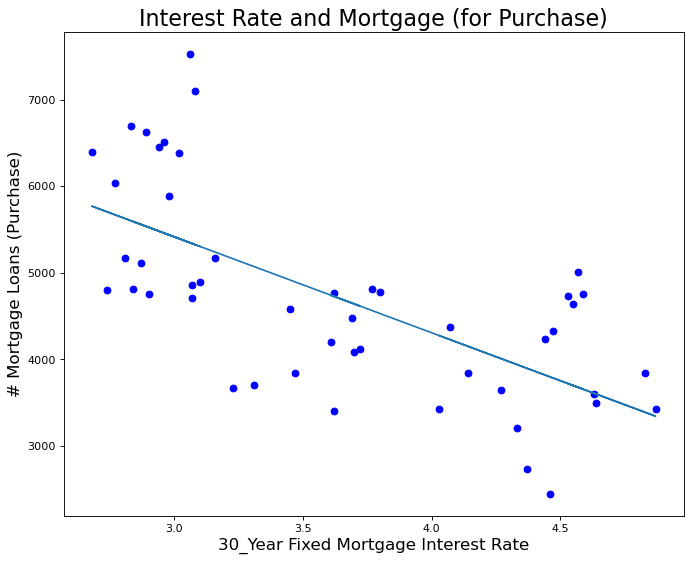

In [39]:
# Analysis 3: Regression Analysis on Interest Rate and Mortgage Origination

# rate with purchase_cnt
figure(figsize = (10, 8), dpi = 80)

x = allcombined['Rate']
y = allcombined['purchase_cnt']

plt.scatter(x, y, color = 'b')
plt.xlabel('30_Year Fixed Mortgage Interest Rate', fontsize = 15)
plt.ylabel('# Mortgage Loans (Purchase)', fontsize = 15)
plt.title('Interest Rate and Mortgage (for Purchase)', fontsize = 20)

# add regression line to show the relationship
k, b = np.polyfit(x, y, 1)
plt.plot(x, k * x + b)
plt.show()

In [40]:
import statsmodels.api as sm

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           purchase_cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     35.56
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.29e-07
Time:                        23:59:21   Log-Likelihood:                -392.55
No. Observations:                  48   AIC:                             789.1
Df Residuals:                      46   BIC:                             792.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8736.9018    687.396     12.710      0.0

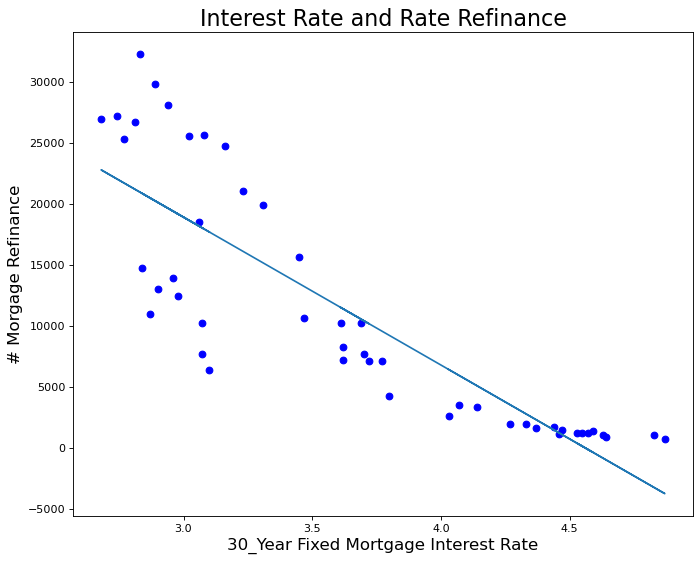

                            OLS Regression Results                            
Dep. Variable:          refinance_cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           3.79e-14
Time:                        00:00:27   Log-Likelihood:                -479.04
No. Observations:                  48   AIC:                             962.1
Df Residuals:                      46   BIC:                             965.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.524e+04   4166.700     13.258      0.0

In [42]:
# rate with refinance_cnt
figure(figsize=(10, 8), dpi=80)

x=allcombined['Rate']
y=allcombined['refinance_cnt']

plt.scatter(x, y, color='b')
plt.xlabel('30_Year Fixed Mortgage Interest Rate', fontsize=15)
plt.ylabel('# Morgage Refinance', fontsize=15)
plt.title("Interest Rate and Rate Refinance", fontsize=20)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

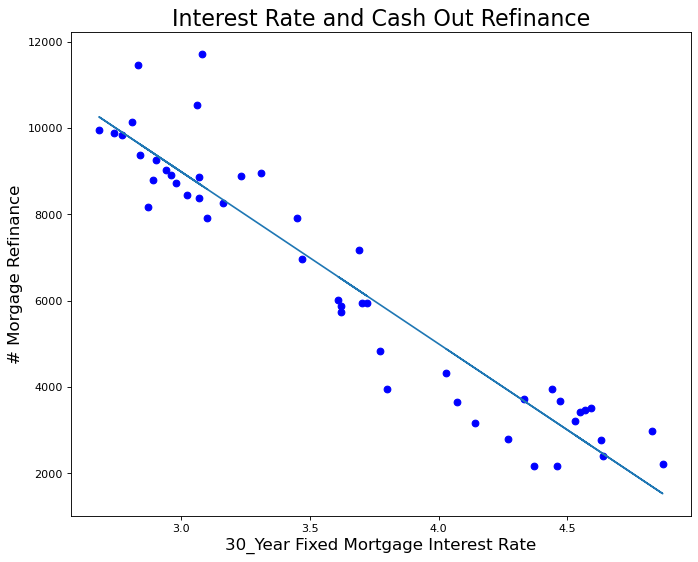

                            OLS Regression Results                            
Dep. Variable:            cashout_cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     403.2
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           2.12e-24
Time:                        00:00:52   Log-Likelihood:                -395.70
No. Observations:                  48   AIC:                             795.4
Df Residuals:                      46   BIC:                             799.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.093e+04    734.025     28.516      0.0

In [43]:
# rate with cashout_cnt
figure(figsize=(10, 8), dpi=80)

x=allcombined['Rate']
y=allcombined['cashout_cnt']

plt.scatter(x, y, color='b')
plt.xlabel('30_Year Fixed Mortgage Interest Rate', fontsize=15)
plt.ylabel('# Morgage Refinance', fontsize=15)
plt.title("Interest Rate and Cash Out Refinance", fontsize=20)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

In [44]:
# Insights from the above analysis

# Coefficient for purchase, refinance and cash out refinance are all < 0, with p value=0. It means interest has a negative impact on all three activities.
# R-squared suggests how well the dots fit the regression line. Higher R-squared means a better fitting (拟合). Its values range from 0 to 1. R-squared=1 means a perfect fitting.
# R-squared=0.898 for cash out refinance, =0.716 for refinance and =0.436 for purchase. It suggests cash out refinance is most senstive to changes in interest rate among three activities.

In [ ]:
# Analysis 4: Interest Rate and Home Price

